In [1]:
import sys
import os
import scipy.ndimage as nd
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as sk
import utils
plt.style.use('ggplot')

In [2]:
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms as tfs
from torch.utils import data

import torch

#### Load datasets

In [14]:
imagenet_data = datasets.ImageFolder('data/png/',
                                     transform=tfs.Compose([tfs.RandomChoice([tfs.ColorJitter()]),
                                                           tfs.Resize((112, 112)),
                                                           tfs.Grayscale(1)]))
      
data_loader = data.DataLoader(imagenet_data, batch_size=4, shuffle=True)

(<PIL.Image.Image image mode=L size=112x112 at 0x7F44773CF320>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F447714F6A0>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F44773EF940>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F44773C36D8>, 0)
(<PIL.Image.Image image mode=L size=112x112 at 0x7F448F990A90>, 0)


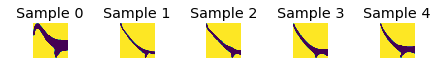

In [15]:
fig = plt.figure()

for i in range(len(imagenet_data)):
    sample = imagenet_data[i + 10]
    print(sample)
    #print(i, sample.shape)
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.imshow(np.asarray(sample[0]))
    ax.set_title('Sample {}'.format(i))
    ax.axis('off')

    if i == 4:
        plt.show()
        break

#### Define generator & GAN

In [16]:
from generator import _G
from discriminator import _D
from gan import GAN
import utils

In [17]:
import time
import pickle

gan = GAN(epochs=200, input_h_w=112)
gan.train()
print("Training finished!")

# visualize learned generator
gan.visualize_results(gan.epoch)


---------- Networks architecture -------------
_G(
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=100352, bias=True)
    (4): BatchNorm1d(100352, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (deconv): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): Sigmoid()
  )
)
Total number of parameters: 103262401
_D(
  (conv): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3

/home/celia/code/vasijas/gan.py:53: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.sample_z_ = Variable(torch.rand((self.batch_size, self.z_dim)).cuda(), volatile=True)
/home/celia/code/vasijas/gan.py:145: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  self.train_hist['D_loss'].append(D_loss.data[0])
/home/celia/code/vasijas/gan.py:156: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  self.train_hist['G_loss'].append(G_loss.data[0])


Avg one epoch time: 2.26, total 200 epochs time: 462.29
Training finish!... save training results
 [*] Training finished!
 [*] Testing finished!


In [ ]:
from IPython.display import HTML
HTML('<img src="/tmp/.gif">')